In [656]:
import numpy as np
import matplotlib.pyplot as plt
import math as math 

In [657]:
#константы солитонного решения
N = 1
lyambda = 0.5
#сетка
J = 800
eps = 0.01
#параметры минимизационного метода
beta = 0.995
deltat = 0.01
h = eps
#количество итераций
K = 10000

In [658]:
#задаем сетку и начальное прилижение для решений
r = np.arange(0, J/100, eps)
a = np.linspace(0, 1, J, dtype = np.float64)
f = np.linspace(0, 1, J, dtype = np.float64)
r = r + eps

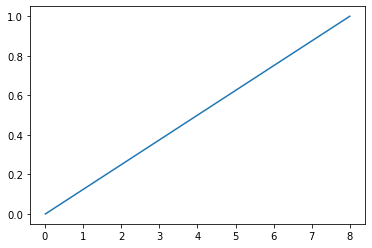

In [659]:
plt.plot(r, a)

In [660]:
print(r, a, f)

[0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13 0.14
 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28
 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41 0.42
 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55 0.56
 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7
 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84
 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98
 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11 1.12
 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25 1.26
 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39 1.4
 1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53 1.54
 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67 1.68
 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81 1.82
 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.94 1.95 1.96
 1.97 1.

In [661]:
#GL-энергия
def energy(r, a, f):
    sum = 0
    for i in range(1, J - 2):
        sum += (a[i+1] - a[i-1]) ** 2 / (r[i] * 4 * eps) + r[i] * (f[i + 1] - f[i - 1]) ** 2 / (4 * eps) \
        + ((N - a[i]) * f[i]) ** 2 * eps/r[i] + lyambda * r[i] * (1 - f[i] ** 2) ** 2 * eps / 4
    return ((4*a[1] - a[2] - 3 * a[0]) ** 2 / (4 * eps * r[0]) + r[0] * (4*f[1] - f[2] - 3 * f[0]) ** 2/(4 * eps) \
        + ((N - a[0]) * f[0]) ** 2 * eps/r[0] + lyambda * r[0] * (1 - f[0] ** 2) ** 2 * eps / 4 \
        + sum + \
        + (3 * a[J - 1] - 4 * a[J - 2] + a[J - 3]) ** 2/(4 * eps * r[J - 1]) + r[J - 1] * (3 * f[J - 1] - 4 * f[J - 2] + f[J - 3]) ** 2/(4 * eps) \
        + ((N - a[J - 1]) * f[J - 1]) ** 2 * eps/r[J - 1] + lyambda * r[J - 1] * (1 - f[J - 1] ** 2) ** 2 * eps / 4)/math.pi

In [662]:
def gradE(r, a, f, i):
    print(energy(r, a, f))
    if i < J: 
        a[i] = a[i] + h
        energy1 = energy(r, a, f)
        a[i] = a[i] - 2 * h
        energy2 = energy(r, a, f)
        a[i] = a[i] + h
    else:
        f[i] = f[i] + h
        energy1 = energy(r, a, f)
        f[i] = f[i] - 2 * h
        energy2 = energy(r, a, f)
        f[i] = f[i] + h
    return (energy1 - energy2)/(2*h)

In [663]:
def gradEa(r, a, f, i):
    if i == 0:
        return (2*(a[0]-a[1])/((r[0] + eps/2)*eps) + 2*(a[0] - N) * f[0]**2 * eps/r[0])/math.pi
    elif i == J - 1:
        return (4*(a[J-1] - a[J-2])/((r[J-1] - eps/2)*eps) + 2*(a[J-1] - N) * f[J-1] ** 2 * eps/r[J-1])/math.pi
    else:
        return (2*(a[i]-a[i-1])/((r[i-1] + eps/2)*eps) + 2*(a[i] - a[i+1])/((r[i] + eps/2)*eps) + 2*(a[i] - N) * f[i]**2 * eps/r[i])/math.pi

In [664]:
def gradEf(r, a, f, i):
    if i == 0:
        return (2*(f[0] - f[1])*(r[0] + eps/2)/eps + 2*(N - a[0]) ** 2 * f[0] * eps/r[0] + lyambda * r[0] * (f[0] ** 2 - 1) * f[0] * eps)/math.pi
    elif i == J - 1: 
        return (4*(f[J-1] - f[J-2])*(r[J-1] - eps/2)/eps + 2*(N - a[J-1]) ** 2 * f[J-1] * eps/r[J-1] + lyambda * r[J-1] * (f[J-1] ** 2 - 1) * f[J-1] * eps)/math.pi
    else:
        return (2*(f[i] - f[i-1])*(r[i-1] + eps/2)/eps + 2*(f[i] - f[i+1])*(r[i] + eps/2)/eps + 2*(N - a[i]) ** 2 * f[i] * eps/r[i] + lyambda * r[i] * (f[i] ** 2 - 1) * f[i] * eps)/math.pi
    

In [665]:
#начально приближение для скорости
v_a = np.zeros(J)
v_f = np.zeros(J)

In [666]:
#i = 50
#print(2*(a[i]-a[i-1])/((r[i-1] + eps/2)*eps) + 2*(a[i] - a[i+1])/((r[i] + eps/2)*eps) + 2*(a[i] - N) * f[i]**2 * eps/r[i])

[6.43605057e-06 1.25372228e-03 2.50457506e-03 3.75579018e-03
 5.00715117e-03 6.25858452e-03 7.51005886e-03 8.76155886e-03
 1.00130761e-02 1.12646054e-02]
[0.00013634 0.00129976 0.00253503 0.00377893 0.00502595 0.00627453
 0.00752402 0.00877409 0.01002456 0.01127531]
[0.00046364 0.00143767 0.00262243 0.00384542 0.00508032 0.00632091
 0.00756476 0.00881068 0.01005799 0.01130631]
[0.00085892 0.00165743 0.00275844 0.00394729 0.00516385 0.00639258
 0.00762809 0.00886785 0.01011046 0.01135512]


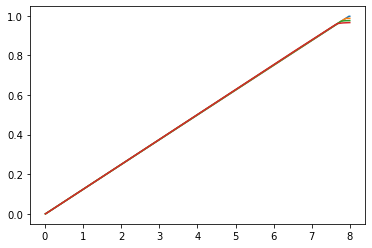

In [667]:
#динамический алгоритм
np.seterr(all ='ignore') 
for i in range(K):
    #расчет скорость
    for k in range(J):
        v_a[k] = beta * v_a[k] - gradEa(r, a, f, k) * deltat
    for l in range(J):
        v_f[l] = beta * v_f[l] - gradEf(r, a, f, l) * deltat
    if (i == 10 or i == 50 or i == 100 or i == 150): 
        print(f[:10])
        plt.plot(r, f)
    a += beta * v_a * deltat
    f += beta * v_f * deltat

In [668]:
print(v_a, v_f)

[ 1.10208639e-03  1.10208694e-03  1.10208876e-03  1.10209256e-03
  1.10209897e-03  1.10210861e-03  1.10212208e-03  1.10213992e-03
  1.10216265e-03  1.10219076e-03  1.10222472e-03  1.10226497e-03
  1.10231191e-03  1.10236595e-03  1.10242743e-03  1.10249670e-03
  1.10257408e-03  1.10265986e-03  1.10275431e-03  1.10285768e-03
  1.10297020e-03  1.10309207e-03  1.10322349e-03  1.10336461e-03
  1.10351559e-03  1.10367656e-03  1.10384761e-03  1.10402885e-03
  1.10422034e-03  1.10442214e-03  1.10463427e-03  1.10485677e-03
  1.10508962e-03  1.10533282e-03  1.10558632e-03  1.10585008e-03
  1.10612403e-03  1.10640809e-03  1.10670217e-03  1.10700615e-03
  1.10731990e-03  1.10764329e-03  1.10797615e-03  1.10831831e-03
  1.10866960e-03  1.10902981e-03  1.10939873e-03  1.10977615e-03
  1.11016181e-03  1.11055548e-03  1.11095689e-03  1.11136578e-03
  1.11178185e-03  1.11220481e-03  1.11263436e-03  1.11307018e-03
  1.11351194e-03  1.11395932e-03  1.11441195e-03  1.11486949e-03
  1.11533158e-03  1.11579

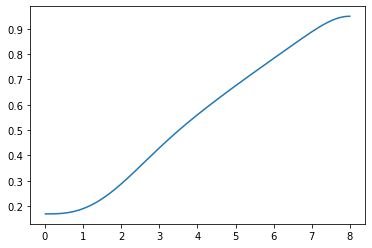

In [669]:
plt.plot(r, a)

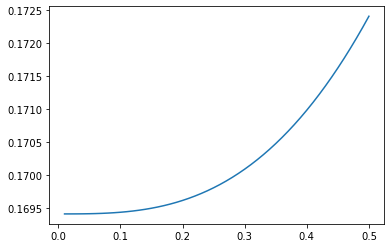

In [670]:
plt.plot(r[:50], a[:50])

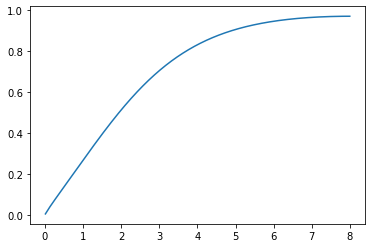

In [671]:
plt.plot(r, f)

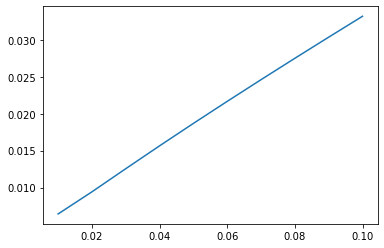

In [672]:
plt.plot(r[:10], f[:10])